In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
%matplotlib inline

In [2]:
wine_data = pd.read_csv('winequality-red.csv')

In [3]:
wine_data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_labels = wine_data['quality']

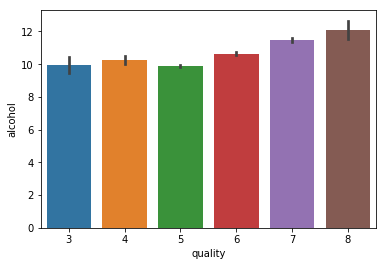

In [5]:
sns.barplot(data=wine_data,x='quality',y='alcohol')

In [6]:
label_q = LabelEncoder()
bins = (2,6.5,8)
groups = ['bad','good']
lb = pd.cut(x = wine_labels,bins= bins,labels=groups)
wl = label_q.fit_transform(lb)

In [7]:
from sklearn.svm import SVC

In [8]:
svm_model = SVC()

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
X = wine_data.drop('quality',axis=1)
y = wl

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
svm_model.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
pred = svm_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [14]:
print (classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       451
           1       0.50      0.12      0.19        77

   micro avg       0.85      0.85      0.85       528
   macro avg       0.68      0.55      0.55       528
weighted avg       0.81      0.85      0.81       528



In [15]:
print (accuracy_score(y_true=y_test,y_pred=pred))

0.8541666666666666


In [22]:
param = {
    'C': [1.2,1.3],
    'kernel':['linear', 'rbf'],
    'gamma' :[1.3,1.4]
}
grid_svc = GridSearchCV(svm_model, param_grid=param, scoring='accuracy', cv=3)


In [23]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.2, 1.3], 'kernel': ['linear', 'rbf'], 'gamma': [1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 1.3, 'kernel': 'rbf'}

In [25]:
pred = grid_svc.predict(X_test)

In [26]:
print (accuracy_score(y_true=y_test,y_pred=pred))

0.884469696969697


In [33]:
cv_results = cross_validate(svm_model,X_train,y_train,scoring='accuracy',cv=10)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [35]:
cv_results['test_score']

array([0.87962963, 0.88785047, 0.91588785, 0.86915888, 0.88785047,
       0.89719626, 0.91588785, 0.86915888, 0.90654206, 0.89719626])